## - MODEL 2 -

### 1. Setup and Load Data

##### 1.1 Install Dependencies and Setup

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.applications import VGG16

In [ ]:
#KALAU PERANGKAT NYA PUNYA GPU
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.2 Remove dodgy images

In [2]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [3]:
data_dir = 'DATA/IMAGES'

In [4]:
image_exts = ['jpeg', 'jpg', 'png']

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

##### 1.3 Load Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = tf.keras.utils.image_dataset_from_directory('DATA/IMAGES/')

class_names = data.class_names
print(class_names)

Found 171 files belonging to 5 classes.
['Grade 1 (Tidak Rusak)', 'Grade 2 (Rusak Ringan)', 'Grade 3 (Rusak Sedang)', 'Grade 4 (Rusak Berat)', 'Grade 5 (Rusak Total)']


### .

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
# Get another batch from the iterator
batch = data_iterator.next()

In [11]:
# Images represented as numpy arrays
batch[0]

array([[[[ 93.25     ,  90.25     ,  73.25     ],
         [109.375    , 102.375    ,  84.375    ],
         [112.625    , 105.625    ,  87.625    ],
         ...,
         [151.875    , 148.875    , 141.875    ],
         [187.25     , 184.25     , 177.25     ],
         [178.       , 175.       , 166.       ]],

        [[ 94.25     ,  89.25     ,  70.25     ],
         [111.5      , 108.75     ,  88.       ],
         [120.25     , 117.5      ,  96.       ],
         ...,
         [190.25     , 189.25     , 184.25     ],
         [199.5      , 199.5      , 191.5      ],
         [140.625    , 136.125    , 129.875    ]],

        [[125.25     , 119.75     , 101.       ],
         [105.75     ,  98.75     ,  80.75     ],
         [107.5      , 102.5      ,  82.5      ],
         ...,
         [194.375    , 194.375    , 186.375    ],
         [161.125    , 161.125    , 151.625    ],
         [122.375    , 114.125    , 114.875    ]],

        ...,

        [[140.25     ,  69.5      ,  8

In [9]:
# Class 0 = Grade 1 (Tidak Rusak)
# Class 1 = Grade 2 (Rusak Ringan)
# Class 2 = Grade 3 (Rusak Sedang)
# Class 3 = Grade 4 (Rusak Berat)
# Class 4 = Grade 5 (Rusak Total)

batch[1]

array([2, 0, 3, 0, 0, 2, 1, 3, 2, 3, 3, 0, 3, 2, 1, 1, 2, 0, 0, 1, 2, 0,
       4, 0, 3, 2, 0, 2, 1, 0, 0, 3])

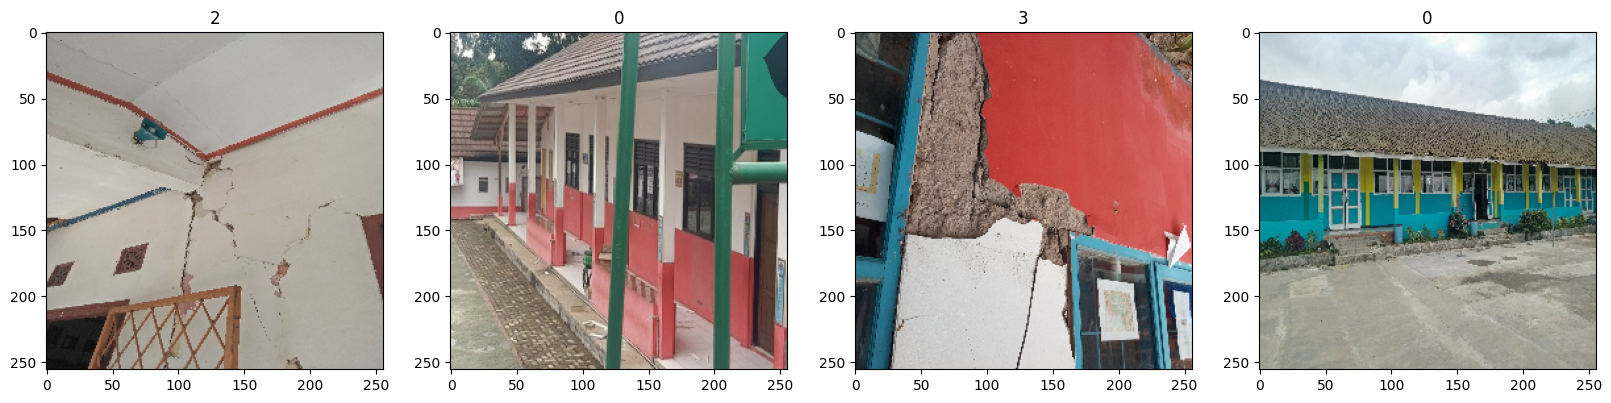

In [10]:
fig, ax = plt.subplots(ncols= 4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2. Preprocess Data

##### 2.1 Scale Data

In [4]:
# Ubah fungsi map untuk mengubah nilai gambar dari 0 - 255 menjadi 0-1 dan 
# label menjadi one-hot encoding

data = data.map(lambda x, y: (x/255, tf.one_hot(y, depth= 5)))

In [8]:
scaled_iterator = data.as_numpy_iterator()

In [9]:
batch = scaled_iterator.next()

In [10]:
batch

(array([[[[7.84313772e-03, 2.35294122e-02, 3.52941193e-02],
          [1.08823534e-02, 2.65686270e-02, 3.83333303e-02],
          [1.66666675e-02, 2.50000004e-02, 3.92156877e-02],
          ...,
          [9.46078449e-02, 5.14705889e-02, 2.79411767e-02],
          [7.97058120e-02, 3.65685560e-02, 1.30391438e-02],
          [7.05882385e-02, 2.74509806e-02, 3.92156886e-03]],
 
         [[1.93321072e-02, 2.35294122e-02, 3.14644612e-02],
          [2.23713238e-02, 2.65686270e-02, 3.45036760e-02],
          [2.57621016e-02, 2.73935348e-02, 3.53860296e-02],
          ...,
          [7.06724897e-02, 2.75352336e-02, 5.44194225e-03],
          [6.22809157e-02, 1.91436633e-02, 3.05604946e-04],
          [5.90992644e-02, 1.59620102e-02, 9.19117665e-05]],
 
         [[3.84497531e-02, 2.35294122e-02, 2.00674012e-02],
          [3.85684744e-02, 2.36481316e-02, 2.01861206e-02],
          [4.10539210e-02, 2.36825980e-02, 1.55101102e-02],
          ...,
          [6.58586100e-02, 1.51845897e-02, 1.9148

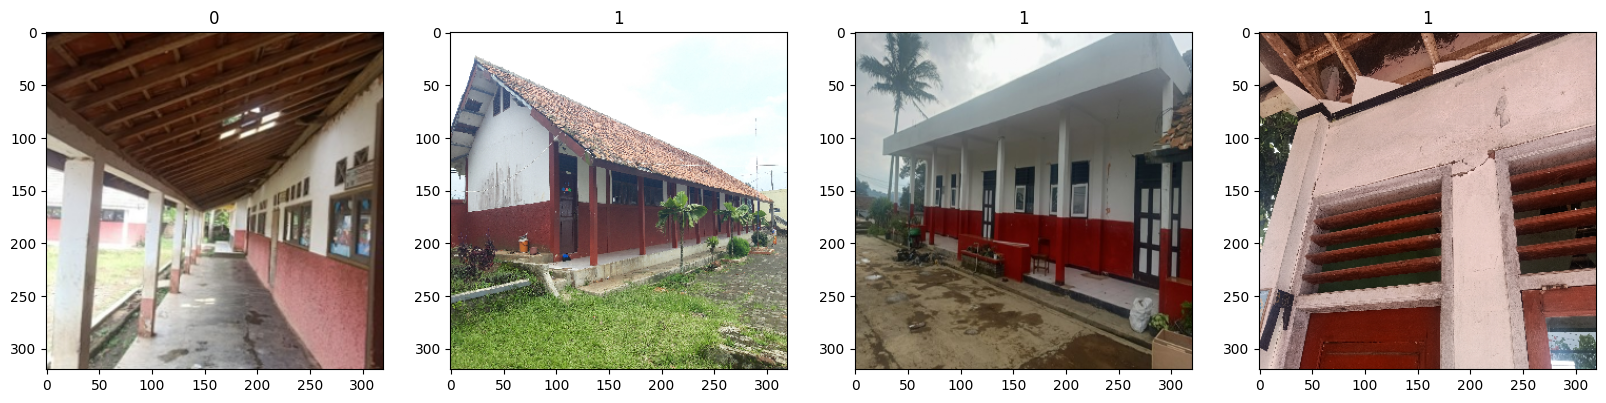

In [12]:
fig, ax = plt.subplots(ncols= 4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(np.argmax(batch[1][idx])) # Ubah label one-hot encoding kembali ke label asli untuk visualisasi

##### 2.2 Augmentasi Data

In [5]:
import cv2
import albumentations as A

# Define augmentation function
def apply_augmentations(image):
    transform = A.Compose([
        A.HorizontalFlip(p=0.5), # Flipping the images horizontally
        A.Rotate(limit=10, p=0.5), # Rotating the images
        A.RandomBrightnessContrast(p=0.5), # Adjusting the brightness and contrast
        A.GaussianBlur(blur_limit=(3, 7), p=0.5), # Applying Gaussian blur
    ])

    augmented = transform(image=image)
    image = augmented['image']
    return image

# Set paths
input_folder = 'DATA/IMAGES/'
output_folder = 'DATA/augmented6/'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get list of grades
grades = ['Grade 1 (Tidak Rusak)', 'Grade 2 (Rusak Ringan)', 'Grade 3 (Rusak Sedang)', 'Grade 4 (Rusak Berat)', 'Grade 5 (Rusak Total)']

# Set the number of augmented images you want to create for each original image
num_augmented_images = 20

# Apply augmentations and save images
for grade in grades:
    grade_folder = os.path.join(input_folder, grade)
    output_grade_folder = os.path.join(output_folder, grade)

    # Create output grade folder if it doesn't exist
    os.makedirs(output_grade_folder, exist_ok=True)

    for filename in os.listdir(grade_folder):
        if filename.endswith('.jpg'):
            # Load image
            image_path = os.path.join(grade_folder, filename)
            image = cv2.imread(image_path)

            # Resize and normalize image, then convert to float32
            image = cv2.resize(image, (320, 320))
            image = (image / 255.0).astype(np.float32)

            for i in range(num_augmented_images):
                # Apply augmentations
                augmented_image = apply_augmentations(image)

                # Create a new filename for the augmented image
                base_filename = os.path.splitext(filename)[0]
                new_filename = f'augmented_{base_filename}_{i}.jpg'

                # Save augmented image
                output_image_path = os.path.join(output_grade_folder, new_filename)
                cv2.imwrite(output_image_path, (augmented_image * 255).astype(np.uint8))

##### 2.3 Split Data

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(data_path, train_ratio, test_ratio, val_ratio):
    partitions = ['Grade 1 (Tidak Rusak)', 'Grade 2 (Rusak Ringan)', 'Grade 3 (Rusak Sedang)', 'Grade 4 (Rusak Berat)', 'Grade 5 (Rusak Total)']

    for partition in partitions:
        images_path = os.path.join(data_path, partition)

        # Get list of images
        images = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

        # Split the images into training, testing, and validation sets
        train_images, test_images = train_test_split(images, test_size=test_ratio + val_ratio, random_state=32)
        test_images, val_images = train_test_split(test_images, test_size=val_ratio / (test_ratio + val_ratio), random_state=32)

        # Create directories for the dataset
        train_dir = os.path.join('F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/train_aug5', partition)
        test_dir = os.path.join('F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/test_aug5', partition)
        val_dir = os.path.join('F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/val_aug5', partition)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)

        # Move the images to the appropriate directories
        for image in train_images:
            src = os.path.join(images_path, image)
            dst = os.path.join(train_dir, image)
            shutil.copyfile(src, dst)

        for image in test_images:
            src = os.path.join(images_path, image)
            dst = os.path.join(test_dir, image)
            shutil.copyfile(src, dst)

        for image in val_images:
            src = os.path.join(images_path, image)
            dst = os.path.join(val_dir, image)
            shutil.copyfile(src, dst)

split_data('F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/augmented6', 0.7, 0.15, 0.15)

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set paths
train_dir = 'F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/train_aug5'
test_dir = 'F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/test_aug5'
val_dir = 'F:/MAHARANI/MBKM/mypy/CNN/Building Damage Detection/DATA/val_aug5'

# Load datasets
train_dataset = image_dataset_from_directory(train_dir, label_mode='categorical', image_size=(320,320), batch_size = 26)  # ubah batch_size disini   #kalau img_size bukan 256, harus atur sndiri mau size berapa
test_dataset = image_dataset_from_directory(test_dir, label_mode='categorical', image_size=(320,320), batch_size= 26)
val_dataset = image_dataset_from_directory(val_dir, label_mode='categorical', image_size=(320,320), batch_size= 26)

# Apply the function to the datasets
train_dataset = train_dataset.map(lambda x, y: (x/255, y))
test_dataset = test_dataset.map(lambda x, y: (x/255, y))
val_dataset = val_dataset.map(lambda x, y: (x/255, y))

Found 3591 files belonging to 5 classes.
Found 768 files belonging to 5 classes.
Found 771 files belonging to 5 classes.


In [17]:
# Ambil satu batch dari dataset
x, y = next(iter(train_dataset))

# Cetak nilai x dan y
print("Nilai x (images):")
print(x)
print("\nNilai y (labels):")
print(y)


Nilai x (images):
tf.Tensor(
[[[[0.14607844 0.40098038 0.4715686 ]
   [0.16289215 0.42053923 0.48563725]
   [0.16642156 0.4252451  0.4879902 ]
   ...
   [0.7382353  0.7245098  0.64411765]
   [0.7395588  0.7234804  0.64387256]
   [0.7392157  0.73137254 0.6490196 ]]

  [[0.15808824 0.4239706  0.4863235 ]
   [0.15784805 0.4245539  0.4852598 ]
   [0.15561275 0.4199265  0.4826716 ]
   ...
   [0.74080884 0.72639704 0.64257354]
   [0.7387696  0.7270147  0.6459657 ]
   [0.7381863  0.73034316 0.6479902 ]]

  [[0.15808824 0.42867646 0.4894608 ]
   [0.14779411 0.4180392  0.47985294]
   [0.13909313 0.4064951  0.47340685]
   ...
   [0.74056375 0.72928923 0.6454657 ]
   [0.74098045 0.7303431  0.6489216 ]
   [0.74338233 0.7296569  0.6492647 ]]

  ...

  [[0.54607844 0.10686275 0.01372549]
   [0.54264706 0.10549019 0.01063726]
   [0.5403186  0.10404412 0.00821078]
   ...
   [0.6786765  0.58235294 0.4814951 ]
   [0.6733579  0.50004876 0.40789187]
   [0.6992647  0.4406863  0.34338236]]

  [[0.5457353  0

##### 2.4 View Augmented Images

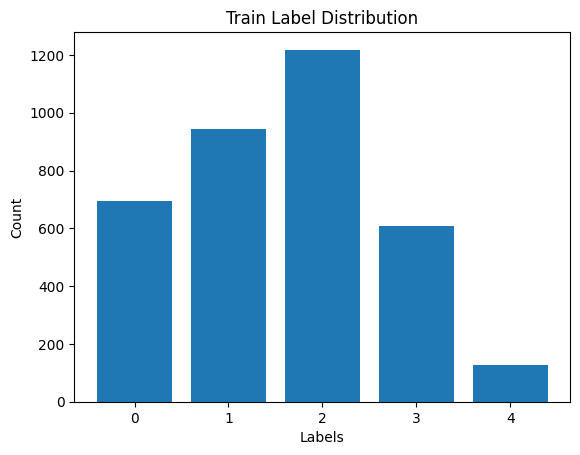

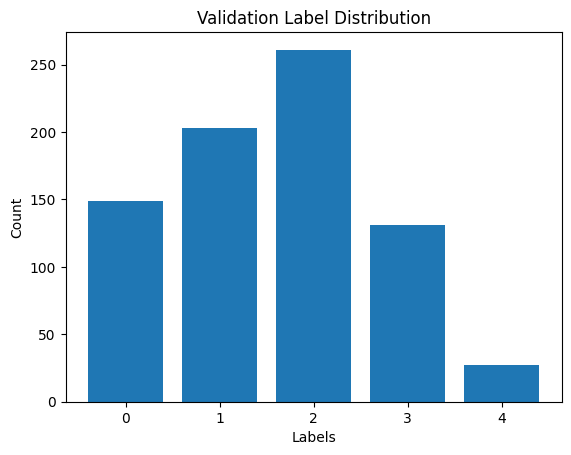

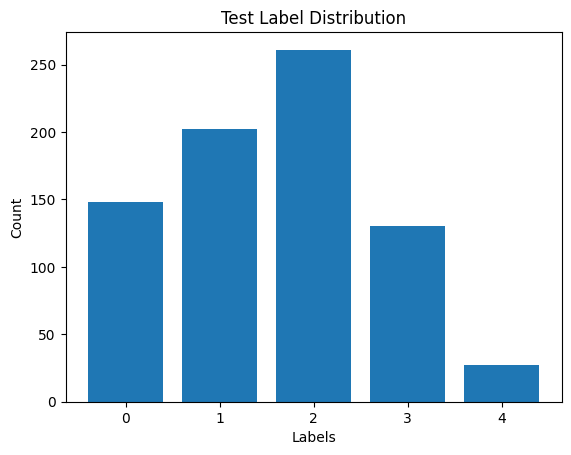

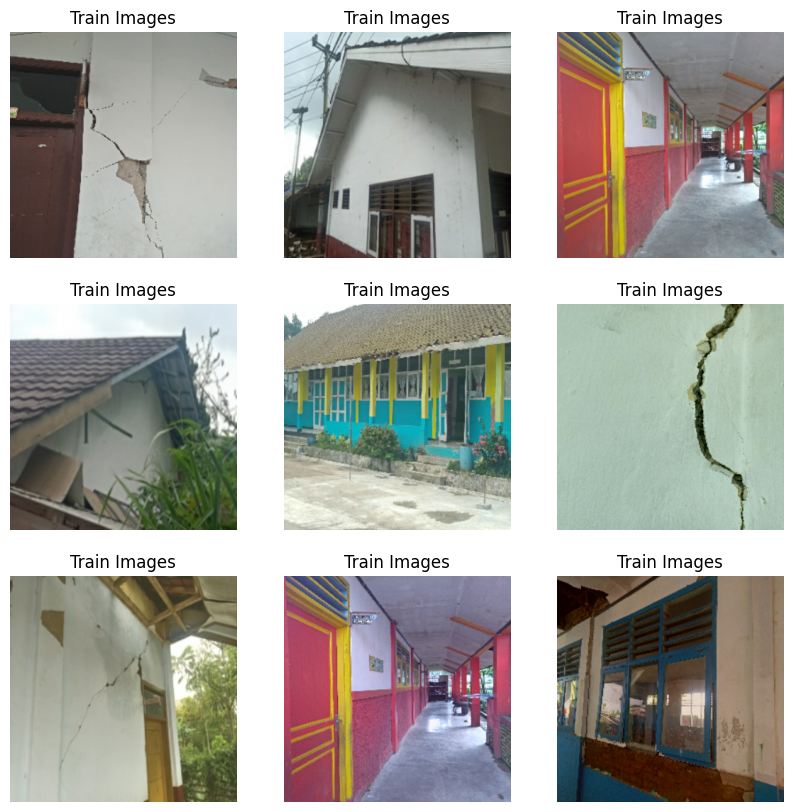

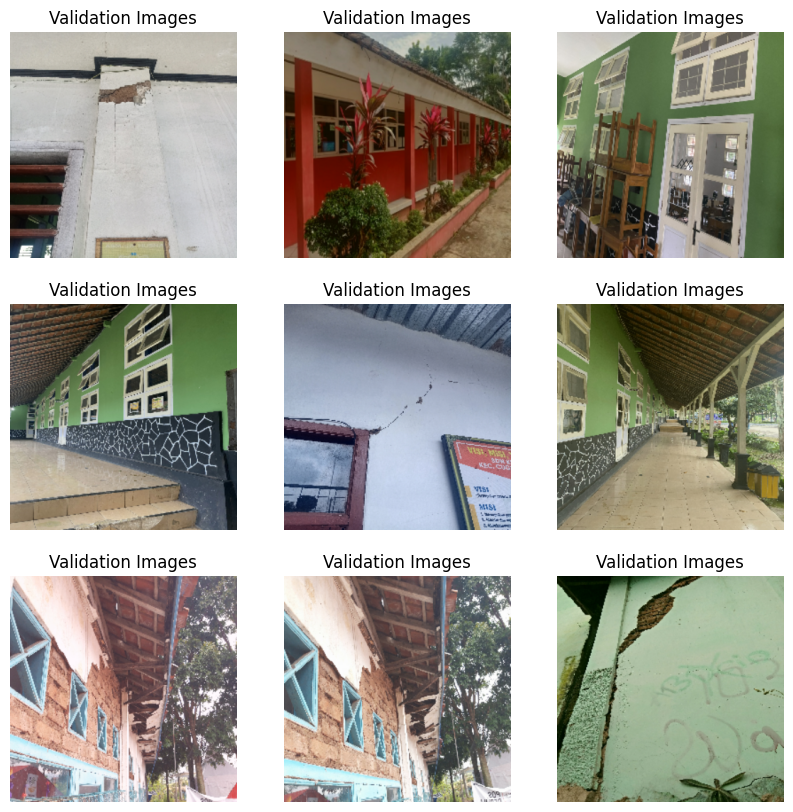

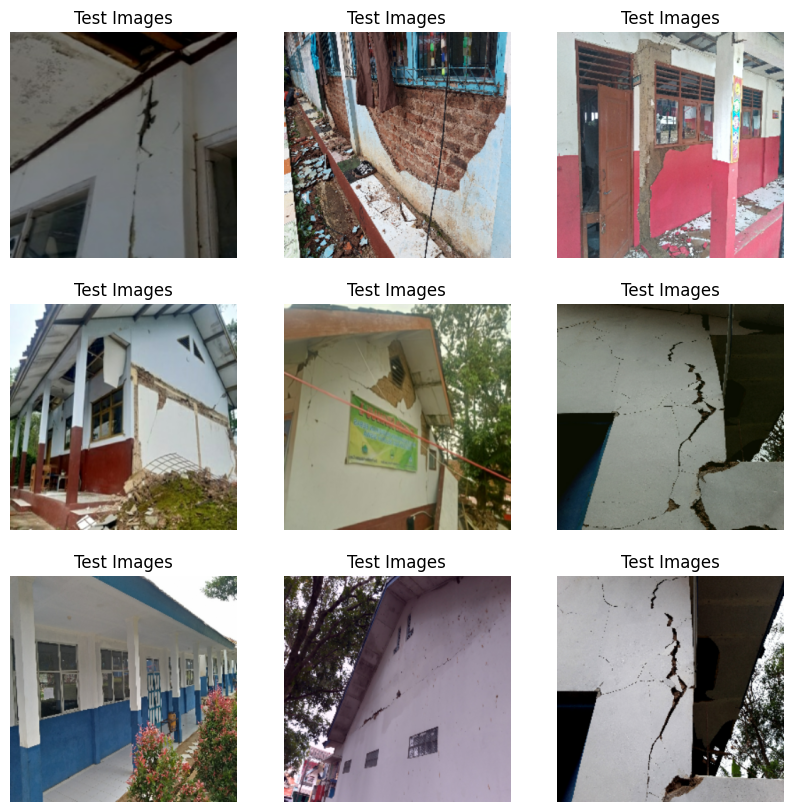

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot distribution of labels
def plot_label_distribution(dataset, title):
    # Get labels from dataset
    labels = []
    for _, label in dataset:
        labels.extend(np.argmax(label.numpy(), axis=1))

    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts)
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.show()

# Plot label distribution for train, validation, and test sets
plot_label_distribution(train_dataset, 'Train Label Distribution')
plot_label_distribution(val_dataset, 'Validation Label Distribution')
plot_label_distribution(test_dataset, 'Test Label Distribution')

# Function to display images
def display_images(dataset, title):
    # Get first batch of images from dataset
    images, _ = next(iter(dataset))

    fig = plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display images for train, validation, and test sets
display_images(train_dataset, 'Train Images')
display_images(val_dataset, 'Validation Images')
display_images(test_dataset, 'Test Images')


### 3. Depp Model

##### 3.1 Build Deep Learning Model

In [5]:

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS):
  # Load the VGG16 network, ensuring the head FC layer sets are left off
  baseModel = VGG16(include_top=False, input_shape=(320, 320, 3))
  model = Sequential([
    baseModel,
    Dense(16, activation = 'relu'),
    Dense(32, activation= 'relu'),
    Dense(16, activation= 'relu'),
    GlobalMaxPooling2D(),
    Dense(256, activation= 'relu'),
    Dropout(0.5),
    Dense(5, activation= 'softmax')     # Menggunakan softmax untuk klasifikasi multikelas 
  ])
  # Fine-tuning: Unfreeze the last convolution block of VGG16
  for layer in baseModel.layers:
      if layer.name.startswith('block5'):
          layer.trainable = True
      else:
          layer.trainable = False

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=tf.keras.losses.CategoricalCrossentropy(),
      metrics=metrics)

  return model

In [6]:
EPOCHS = 50

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=5,
    mode='min',
    restore_best_weights=True)

logdir = 'logs5.1.1 (VGG16, nolabel)'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)


In [7]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 dense (Dense)               (None, 10, 10, 16)        8208      
                                                                 
 dense_1 (Dense)             (None, 10, 10, 32)        544       
                                                                 
 dense_2 (Dense)             (None, 10, 10, 16)        528       
                                                                 
 global_max_pooling2d (Glob  (None, 16)                0         
 alMaxPooling2D)                                                 
                                                                 
 dense_3 (Dense)             (None, 256)               4352      
                                                        

In [8]:
from sklearn.utils import class_weight
import numpy as np

# Assuming that `train_labels` is a 2-D array containing the one-hot encoded class labels
# Convert one-hot encoded labels to class labels
train_labels = []
for _, label in train_dataset:
    train_labels.extend(np.argmax(label.numpy(), axis=1))

# Calculate the class weights
weights = class_weight.compute_sample_weight('balanced', train_labels)
class_weights = dict(enumerate(weights))


##### 3.2 Train

In [9]:
model = make_model()

baseline_history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    callbacks=[tensorboard_callback, early_stopping],
    validation_data= val_dataset,
    class_weight= class_weights)

Epoch 1/50
139/139 [==============================] - 876s 6s/step - loss: 2.0909 - tp: 1093.0000 - fp: 1215.0000 - tn: 13149.0000 - fn: 2498.0000 - accuracy: 0.3395 - precision: 0.4736 - recall: 0.3044 - auc: 0.7085 - prc: 0.4406 - val_loss: 1.1508 - val_tp: 219.0000 - val_fp: 18.0000 - val_tn: 3066.0000 - val_fn: 552.0000 - val_accuracy: 0.4462 - val_precision: 0.9241 - val_recall: 0.2840 - val_auc: 0.7896 - val_prc: 0.5693
Epoch 2/50
139/139 [==============================] - 1818s 13s/step - loss: 1.2280 - tp: 1178.0000 - fp: 223.0000 - tn: 14141.0000 - fn: 2413.0000 - accuracy: 0.5157 - precision: 0.8408 - recall: 0.3280 - auc: 0.8418 - prc: 0.6415 - val_loss: 0.8724 - val_tp: 256.0000 - val_fp: 8.0000 - val_tn: 3076.0000 - val_fn: 515.0000 - val_accuracy: 0.5863 - val_precision: 0.9697 - val_recall: 0.3320 - val_auc: 0.8984 - val_prc: 0.7443
Epoch 3/50
139/139 [==============================] - 963s 7s/step - loss: 1.0099 - tp: 1224.0000 - fp: 105.0000 - tn: 14259.0000 - fn: 2367

##### 3.3 Plot Performance

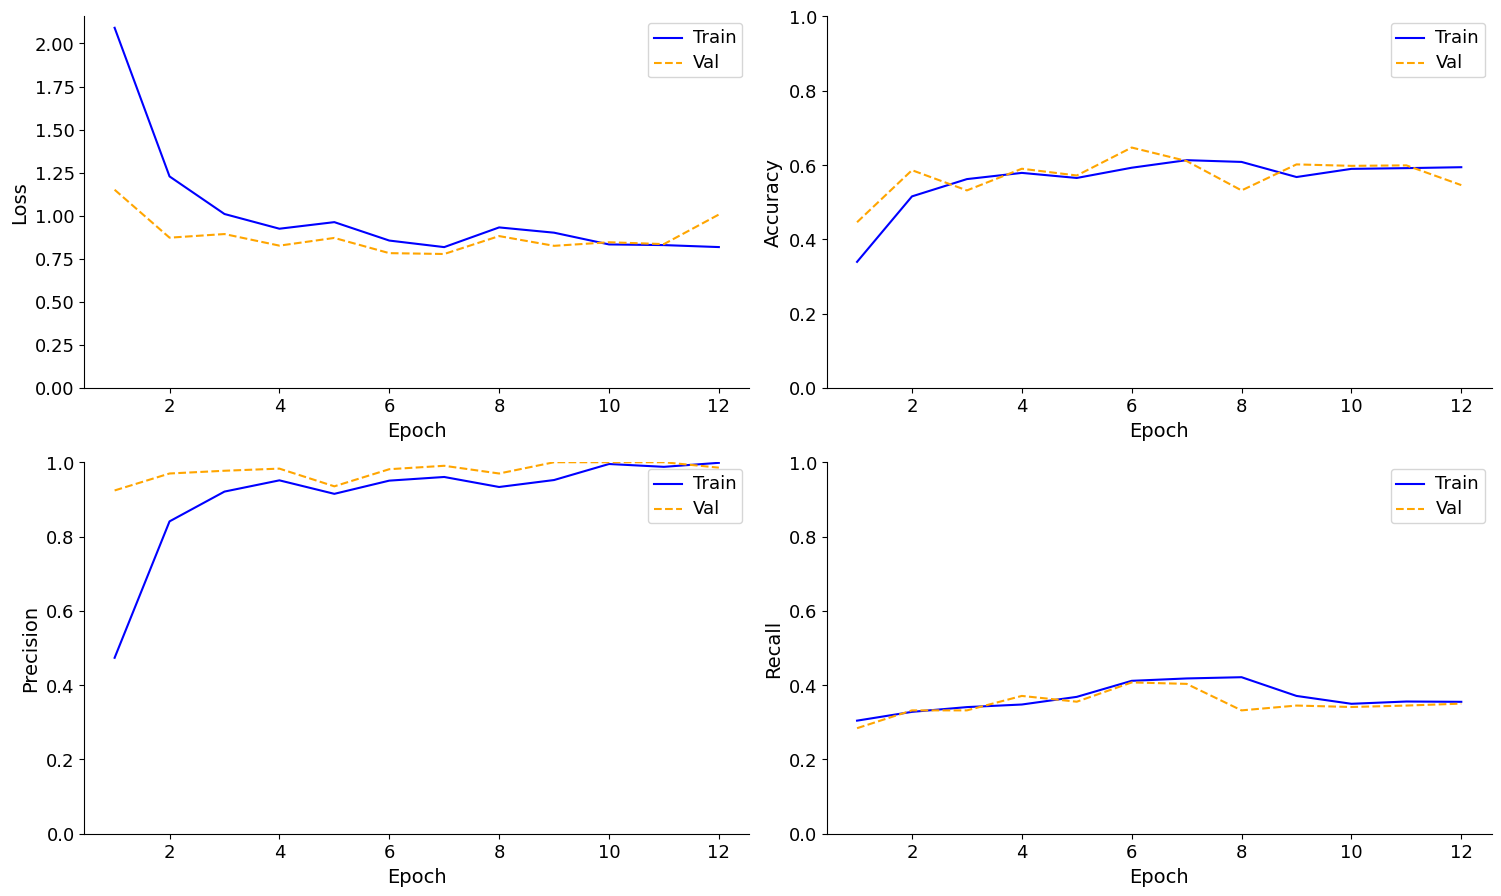

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'precision', 'recall']
    plt.figure(figsize=(15, 13))
    data = {}  # Dictionary to store metric values for each epoch
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(3,2,n+1)

        #Menghapus bingkai 'atas' dan 'kanan' di setiap subplot
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        plt.plot([epoch + 1 for epoch in history.epoch], history.history[metric], color= 'blue', label='Train')
        plt.plot([epoch + 1 for epoch in history.epoch], history.history['val_'+metric],
                 color= 'orange', linestyle="--", label='Val')
        plt.xlabel('Epoch', fontsize=14)  # Set font size for x-axis label
        plt.ylabel(name, fontsize=14)  # Set font size for y-axis label
        plt.tick_params(axis='both', which='major', labelsize=13)  # Set font size for numbers on x and y axis
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        legend = plt.legend()
        plt.setp(legend.get_texts(), fontsize=13)  # Set font size for legend

        # Store metric values in the dictionary
        data[f'train_{metric}'] = history.history[metric]
        data[f'val_{metric}'] = history.history['val_'+metric]

    plt.subplots_adjust(hspace=0.7, wspace=0.7)  # Adjust the spacing between subplots
    plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding

    # Create a DataFrame from the dictionary and save it as a CSV file
    df = pd.DataFrame(data)
    df.to_csv('metrics classes model 2.csv', index=False)

plot_metrics(baseline_history)


### 4. Evaluate Performance

##### 4.1 Evaluate

In [11]:
train_predictions_baseline = model.predict(train_dataset)
test_predictions_baseline = model.predict(test_dataset)

30/30 [==============================] - 135s 4s/step


In [31]:
test_predictions_baseline

array([[1.00000000e+00, 5.59238582e-13, 1.36118054e-17, 4.36899615e-37,
        1.70242314e-12],
       [9.99942780e-01, 2.31360846e-05, 2.23055576e-06, 8.34755225e-13,
        3.18543789e-05],
       [1.40615102e-12, 1.25354015e-14, 3.65834186e-12, 1.00000000e+00,
        1.39551473e-15],
       ...,
       [2.10436557e-09, 1.37809852e-09, 2.46174174e-08, 1.00000000e+00,
        6.70037012e-11],
       [1.00000000e+00, 2.32759831e-23, 1.36163379e-30, 0.00000000e+00,
        1.95027873e-23],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00]], dtype=float32)

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(labels, predictions, threshold=0.5):
  # Konversi one-hot encoded labels ke label kelas
  class_labels = np.argmax(labels, axis=1)

  # Konversi prediksi ke label kelas berdasarkan ambang batas
  class_predictions = np.argmax(predictions, axis=1)
  thresholded_predictions = [1 if pred > threshold else 0 for pred in class_predictions]

  cm = confusion_matrix(class_labels, thresholded_predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Evaluate on test data
30/30 [==============================] - 119s 4s/step - loss: 0.8307 - tp: 310.0000 - fp: 7.0000 - tn: 3065.0000 - fn: 458.0000 - accuracy: 0.6068 - precision: 0.9779 - recall: 0.4036 - auc: 0.9019 - prc: 0.7438
loss :  0.8307049870491028
tp :  310.0
fp :  7.0
tn :  3065.0
fn :  458.0
accuracy :  0.6067708134651184
precision :  0.9779179692268372
recall :  0.4036458432674408
auc :  0.9018783569335938
prc :  0.743769645690918

Classification Report
              precision    recall  f1-score   support

           0       0.21      0.61      0.31       148
           1       0.25      0.08      0.12       202
           2       0.39      0.40      0.39       261
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00        27

    accuracy                           0.27       768
   macro avg       0.17      0.22      0.16       768
weighted avg       0.24      0.27      0.22       768

Confusion Matrix


f:\MAHARANI\MBKM\mypy\CNN\Building Damage Detection\bdetect\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\MAHARANI\MBKM\mypy\CNN\Building Damage Detection\bdetect\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\MAHARANI\MBKM\mypy\CNN\Building Damage Detection\bdetect\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Legitimate Transactions Detected (True Negatives):  90
Legitimate Transactions Incorrectly Detected (False Positives):  58
Fraudulent Transactions Missed (False Negatives):  119
Fraudulent Transactions Detected (True Positives):  83
Total Fraudulent Transactions:  202


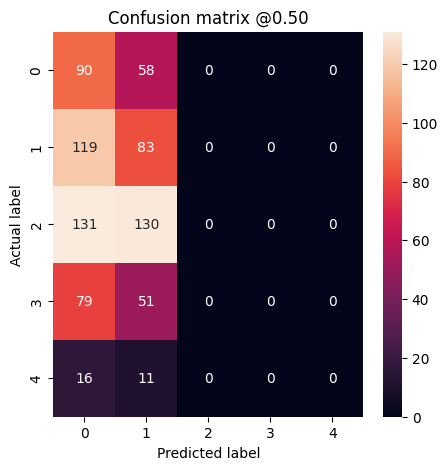

In [14]:
from sklearn.metrics import classification_report

# Evaluasi model
print("Evaluate on test data")
results = model.evaluate(test_dataset)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

# Dapatkan label dari test_dataset
test_labels = []
for _, labels in test_dataset:
    test_labels.extend(labels.numpy())
test_labels = np.array(test_labels)

# Ubah test_labels dari one-hot encoding menjadi multiclass
test_labels2 = np.argmax(test_labels, axis=1)

# Prediksi label dari test_dataset
test_predictions = np.argmax(test_predictions_baseline, axis=1)  # Mengubah probabilitas menjadi label

# Cetak classification report
print("Classification Report")
print(classification_report(test_labels2, test_predictions))

# Plot confusion matrix
print("Confusion Matrix")
plot_cm(test_labels, test_predictions_baseline)


##### 4.2 Test

In [14]:
import cv2

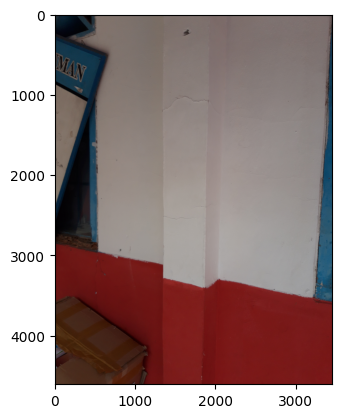

In [15]:
img_test = cv2.imread('DATA/IMAGES - Copy/Grade 2 (Rusak Ringan)/20221207_163852.jpg')
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show()

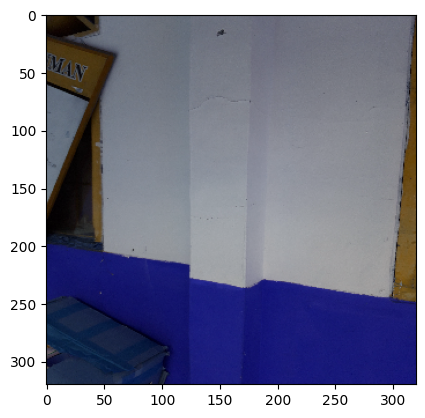

In [16]:
resize = tf.image.resize(img_test,(320,320))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [17]:
resize.shape

TensorShape([320, 320, 3])

In [18]:
np.expand_dims(resize, 0)

array([[[[ 20.640001 ,   7.6400003,   9.64     ],
         [ 55.92001  ,  46.22001  ,  36.520008 ],
         [ 53.9      ,  44.9      ,  31.9      ],
         ...,
         [ 91.45     ,  89.45     , 101.45     ],
         [ 92.48972  ,  90.78977  , 102.189674 ],
         [ 59.070168 ,  55.070168 ,  60.070168 ]],

        [[ 26.409994 ,  16.409994 ,   9.499996 ],
         [ 48.349995 ,  41.179996 ,  25.649998 ],
         [ 52.350002 ,  43.350002 ,  29.350002 ],
         ...,
         [ 82.5      ,  79.95     ,  93.6      ],
         [ 73.34959  ,  71.14959  ,  83.14959  ],
         [ 70.931206 ,  68.75123  ,  74.75123  ]],

        [[ 54.       ,  44.95     ,  33.6      ],
         [ 53.449997 ,  43.75     ,  29.749998 ],
         [ 53.25     ,  44.5      ,  31.5      ],
         ...,
         [ 91.25     ,  91.25     , 104.25     ],
         [ 84.29956  ,  84.649536 ,  95.949585 ],
         [ 61.5      ,  55.44995  ,  53.249756 ]],

        ...,

        [[ 44.1      ,  61.1      ,  8

In [19]:
# Prediksi kelas
yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = np.argmax(yhat)

1/1 [==============================] - 1s 963ms/step


In [24]:
predicted_class

1

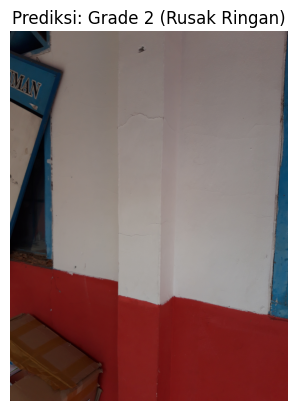

In [20]:
# Menampilkan gambar
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Menampilkan prediksi kelas
if predicted_class == 0:
    plt.title("Prediksi: Grade 1 (Tidak Rusak)")
elif predicted_class == 1:
    plt.title("Prediksi: Grade 2 (Rusak Ringan)")
elif predicted_class == 2:
    plt.title("Prediksi: Grade 3 (Rusak Sedang)")
elif predicted_class == 3:
    plt.title("Prediksi: Grade 4 (Rusak Berat)")
elif predicted_class == 4:
    plt.title("Prediksi: Grade 5 (Rusak Total)")
else:
    plt.title("Prediksi tidak diketahui")

plt.show()

### 5. Save the Model

##### 5.1 Save the Model

In [15]:
# Save the model
model.save('damageclassifier_versi5.1.1_noLABELLING_VGG16.h5')

f:\MAHARANI\MBKM\mypy\CNN\Building Damage Detection\bdetect\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
